In [1]:
#Polinomial linear regression
# y = a + bx + cx^2 + ... + nx^n + ...

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset = dataset.drop(['Position'], axis = True) # yazı olan kısım bizi ilgilendirmiyor silebiliriz

In [6]:
dataset.info

<bound method DataFrame.info of    Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000>

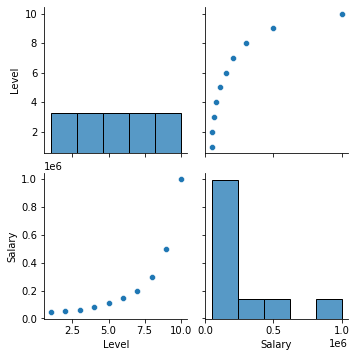

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((8, 1), (2, 1), (8,), (2,))

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [12]:
print('Training accuracy', lin_reg.score(Xtrain,ytrain))#başarı oranını hesaplama
print('Training accuracy', lin_reg.score(Xtest,ytest))

Training accuracy 0.6366049276570868
Training accuracy 0.8451346684575975


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(Xtrain)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, ytrain)
X_poly_test= poly_reg.transform(Xtest)

In [14]:
print('Training accuracy', lin_reg2.score(X_poly,ytrain))#başarı oranını hesaplama
print('Training accuracy', lin_reg2.score(X_poly_test,ytest))

Training accuracy 0.9995857211026754
Training accuracy 0.9714666803841844


<function matplotlib.pyplot.show(close=None, block=None)>

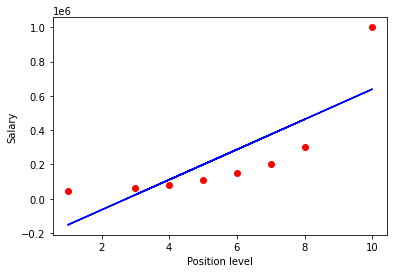

In [17]:
plt.scatter(Xtrain.values, ytrain.values, color= 'red')
plt.plot(Xtrain.values, lin_reg.predict(Xtrain), color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

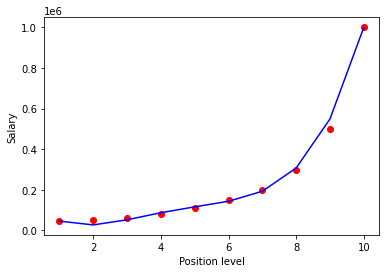

In [19]:
plt.scatter(X.values, y.values, color= 'red')
plt.plot(X.values, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue') #Polinomical çıktı alma
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [20]:
#Multiple linear regression